<a href="https://colab.research.google.com/github/qarni4126-ui/Linear_Reg_proj/blob/main/Linear_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("insurance.csv")

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='sex', ylabel='charges'>

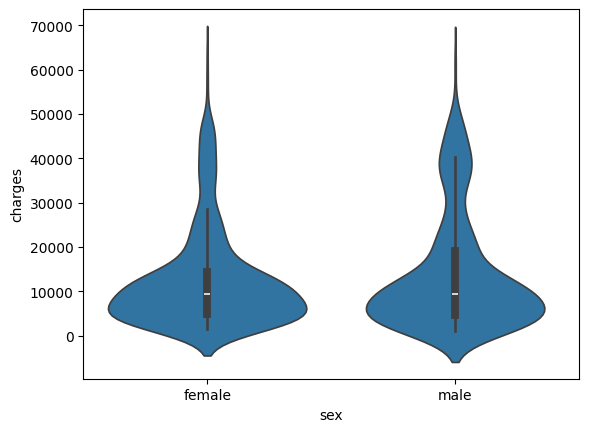

In [7]:
sns.violinplot(x="sex", y="charges", data=df)

<Axes: xlabel='bmi', ylabel='charges'>

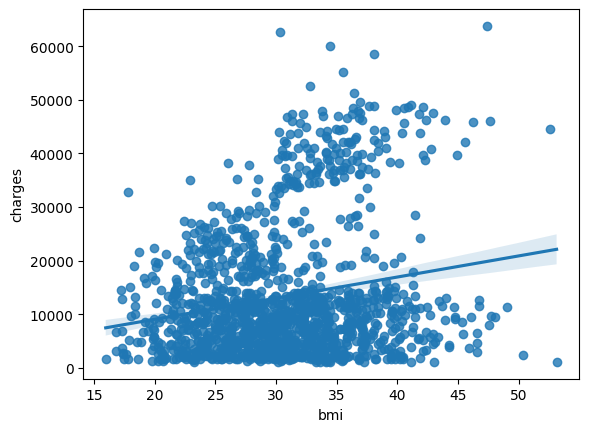

In [8]:
sns.regplot(x="bmi", y="charges", data=df, logx=False)

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop("charges", axis=1)
Y = df_encoded["charges"]
Y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [11]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
332,61,31.160,0,False,False,True,False,False
355,46,27.600,0,True,False,False,False,True
138,54,31.900,3,False,False,False,True,False
381,55,30.685,0,True,True,False,False,False
292,25,45.540,2,True,True,False,True,False
...,...,...,...,...,...,...,...,...
1095,18,31.350,4,False,False,False,False,False
1130,39,23.870,5,False,False,False,True,False
1294,58,25.175,0,True,False,False,False,False
860,37,47.600,2,False,True,False,False,True


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression= LinearRegression()
regression.fit(X_train,Y_train)
mse=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=5)

In [14]:
np.mean(mse)

np.float64(-38547821.97192635)

In [15]:
reg_pred=regression.predict(X_test)

In [16]:
reg_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

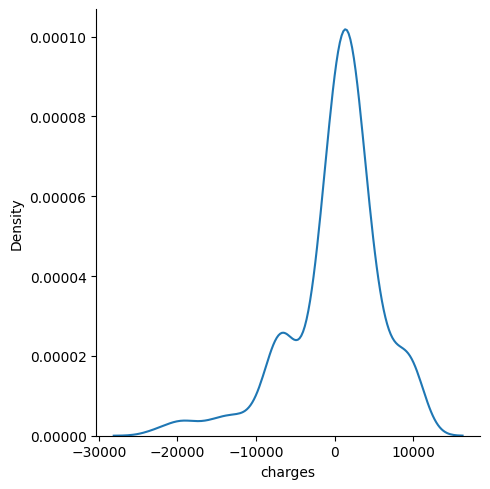

In [17]:
sns.displot(reg_pred-Y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,reg_pred)

In [19]:
score

0.769611805436901